<a href="https://colab.research.google.com/github/nimarafati/Physalia_coding_excercises/blob/master/lab_day2/day2_code03_neural_networks_%5BEXERCISE%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural networks models: practicals

In this notebook you will practice simple neural networks models for classification. 
We will be using the `breast cancer` dataset:

- binary classification problem: breast cancer diagnosis, `0`: `malignant`, `1`: `benign`
- EDA: look at the data
- split between the training and the test sets
- number of hidden layers
- number of nodes within layers
- type of activation functions in the hidden layers
- number of epochs
- number of features to include in the model
- etc.

Let's start by importing some basic libraries and the data:

In [1]:
## import libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()
y = bcancer.target
X = bcancer.data
y.shape

(569,)

In [3]:
from collections import Counter
print(Counter(y))

Counter({1: 357, 0: 212})


In [4]:
print(bcancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

It's now your turn to go on with the exercise:

1. explore the data
2. prepare the data (e.g. should we normalize the data?)
3. split the data into training and validation sets
4. define the neural network model
5. train the model
6. evaluate model performance

# Features

In [5]:
bcancer.data = pd.DataFrame(bcancer.data, columns=bcancer.feature_names) #converting numpy array -> pandas DataFrame
bcancer.target = pd.Series(bcancer.target) #converting numpy array -> pandas Series
bcancer.target = bcancer.target.to_frame() #converting Pandas series to dataframe
print('Shape of the feature table: ' + str(bcancer.data.shape))
print('Shape of the target array: ' + str(bcancer.target.shape))


Shape of the feature table: (569, 30)
Shape of the target array: (569, 1)


# Normalizing

In [6]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
bcancer.data_std = scaler.fit_transform(bcancer.data)
bcancer.data_std = pd.DataFrame(bcancer.data_std)

features = bcancer.data_std.iloc[:,:]
target = bcancer.target

# Training and Testing

In [7]:
#we want to have the same proportion of classes in both train and validation sets
from sklearn.model_selection import StratifiedShuffleSplit

#building a StratifiedShuffleSplit object (sss among friends) with 20% data
#assigned to validation set (here called "test")
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

#the .split() method returns (an iterable over) two lists which can be
#used to index the samples that go into train and validation sets
for train_index, val_index in sss.split(features, target):
    features_train = features.iloc[train_index, :]
    features_val   = features.iloc[val_index, :]
    target_train   = target.iloc[train_index,:]
    target_val     = target.iloc[val_index,:]
    
#let's print some shapes to get an idea of the resulting data structure
print("Training features size: ", features_train.shape)
print("Test features size: ", features_val.shape)
print("Training targets size: ", target_train.shape)
print("Test targets size: ", target_val.shape)

print("Type of the training features object: ", type(features_train))
print("Type of the training targets object: ", type(target_train))

Training features size:  (455, 30)
Test features size:  (114, 30)
Training targets size:  (455, 1)
Test targets size:  (114, 1)
Type of the training features object:  <class 'pandas.core.frame.DataFrame'>
Type of the training targets object:  <class 'pandas.core.frame.DataFrame'>


# Neural network model

In [8]:
## # Configuration options
input_shape = (features.shape[1],) ## tuple that specifies the number of features 
hidden_nodes = 8
hidden_activation = 'relu'
output_activation = 'sigmoid'
loss_function = 'binary_crossentropy'
optimizer_used = 'SGD' ##stochastic gradient descent
num_epochs = 200
print(input_shape)

(30,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 248       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 5)                 45        
                                                                 
 dense_8 (Dense)             (None, 3)                 18        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
None


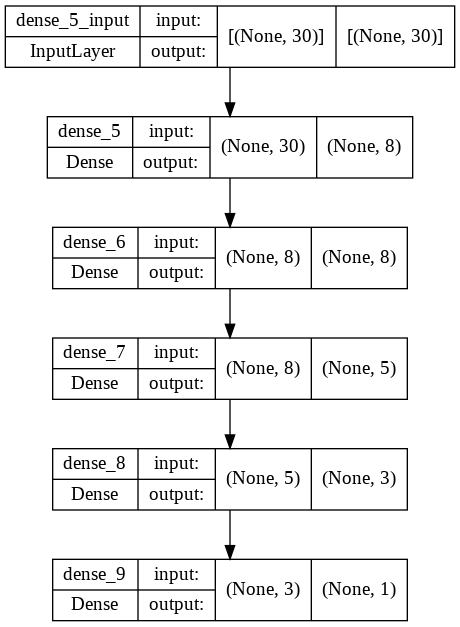

In [10]:
#we are building a "sequential" model, meaning that the data will 
#flow like INPUT -> ELABORATION -> OUTPUT.
from keras.models import Sequential

#a "dense" layer is a layer were all the data coming in are connected
#to all nodes.
from keras.layers import Dense

from keras.utils.vis_utils import plot_model 


# binary classification shallow neural network model in Keras
model = Sequential()
model.add(Dense(units=hidden_nodes, input_shape=input_shape, activation=hidden_activation))
model.add(Dense(8, activation=hidden_activation))
model.add(Dense(5, activation=hidden_activation))
model.add(Dense(3, activation=hidden_activation))
model.add(Dense(1, activation=output_activation))

#the model is declared, but we still need to compile it to actually
#build all the data structures
model.compile(optimizer=optimizer_used, loss=loss_function)
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)


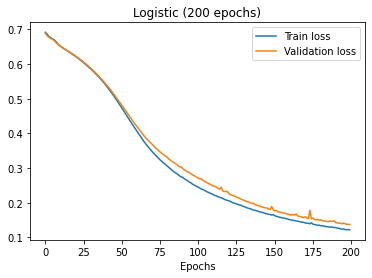

In [ ]:
history = model.fit(features_train, target_train, epochs=num_epochs, validation_data=(features_val, target_val), verbose=0)
def plot_loss_history(h, title):
    plt.plot(h.history['loss'], label = "Train loss")
    plt.plot(h.history['val_loss'], label = "Validation loss")
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_history(history, 'Logistic ({} epochs)'.format(num_epochs))

[[39  3]
 [ 0 72]]


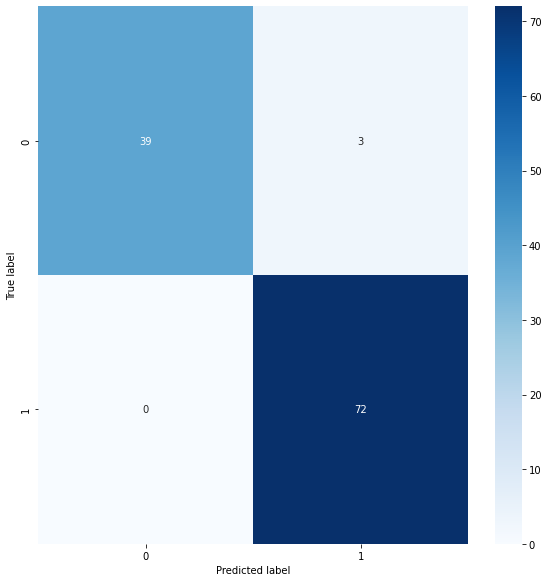

Counter({0: 42, 1: 72})

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(features_val)
predicted_labels = np.where(predictions > 0.5, "virginica", "non-virginica")
target_labels = target_val.to_numpy().reshape((len(target_val),1))
target_labels = np.where(target_labels > 0.5, "virginica", "non-virginica")

con_mat_df = confusion_matrix(target_labels, predicted_labels, labels=["non-virginica","virginica"])
print(con_mat_df)

import seaborn as sn

figure = plt.figure(figsize=(8, 8))
sn.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
Counter(target_val[0])

Counter({0: 42, 1: 72})